In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

np.random.seed(18)
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]

N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0,X1,X2), axis = 0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

<function matplotlib.pyplot.show(close=None, block=None)>

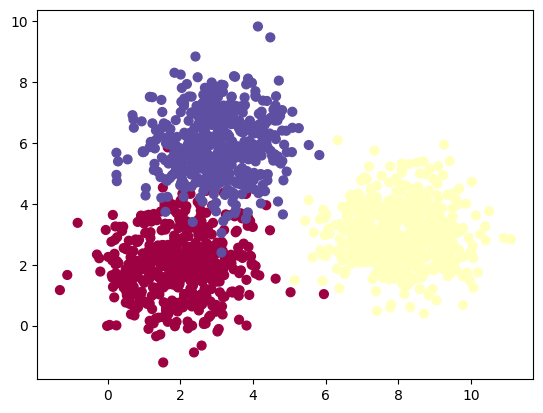

In [ ]:
plt.scatter(X[:,0], X[:,1], c = original_label, s = 40, cmap = plt.cm.Spectral)
plt.show

In [ ]:
def KMeans_init_centroids(X, k):
  return X[np.random.choice(X.shape[0], K, replace = False)]

def KMeans_assign_labels(X, centroids):
  #Calculate pairwise distance
  D = cdist(X, centroids)
  #Assign labels based on min distance
  return np.argmin(D, axis = 1)

def is_converged(centroids, new_centroids):
  #Stop the algorithm if the centroids aren't changed
  return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

def KMeans_update_centroids(X, labels, K):
  #Init the centroids
  centroids = np.zeros((K, X.shape[1]))
  for k in range(K):
    #Get the points that is in Kth group
    Xk = X[labels == k, :]
    #Update the centroid by the mean of all the points in Kth group
    centroids[k,:] = np.mean(Xk, axis = 0)
  return centroids

In [ ]:
def KMeans(X, K):
  centroids = [KMeans_init_centroids(X,K)]
  labels = []
  it = 0
  while True:
    labels.append(KMeans_assign_labels(X, centroids[-1]))
    new_centroids = KMeans_update_centroids(X, labels[-1], K)
    if is_converged(centroids[-1], new_centroids):
      break
    centroids.append(new_centroids)
    it += 1
  return (centroids, labels, it)

In [ ]:
centroids, labels, it = KMeans(X, K)

print('Centers found by our algorithm:\n', centroids[-1])

Centers found by our algorithm:
 [[8.07476866 3.01494931]
 [1.9834967  1.96588127]
 [3.02702878 5.95686115]]


In [ ]:
 from sklearn.cluster import KMeans
 model = KMeans(n_clusters = 3, random_state = 0).fit(X)
 print('Centers found by scikit-learn:', model.cluster_centers_)

 pred_label = model.predict(X)

Centers found by scikit-learn: [[8.07476866 3.01494931]
 [3.02429957 5.95334038]
 [1.98417154 1.96141961]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


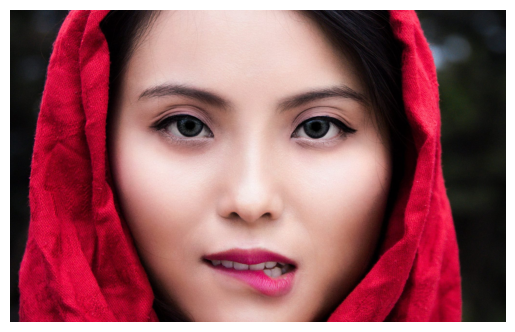

In [ ]:
#Project: Object segmentation

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
img = mpimg.imread('test.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
X = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


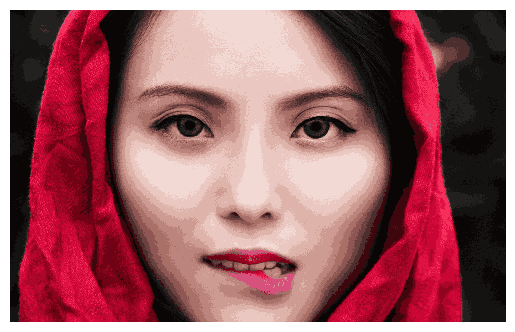

In [ ]:
for K in [5,10,15,20]:
  kmeans = KMeans(n_clusters = K).fit(X)
  label = kmeans.predict(X)

img4 = np.zeros_like(X)
#Replace each pixel by its centroid
for k in range(K):
  img4[label == k] = kmeans.cluster_centers_[k]

#Reshape and display output image
img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img5, interpolation = 'nearest')
plt.axis('off')
plt.show()

array([3, 4])

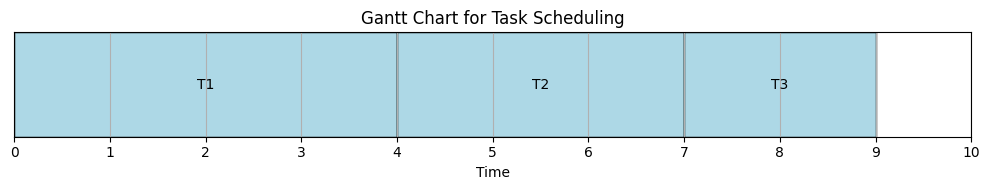

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Data for tasks
tasks = {
    'T1': {'arrival': 0, 'start': 0, 'duration': 4},
    'T2': {'arrival': 1, 'start': 4, 'duration': 3},
    'T3': {'arrival': 2, 'start': 7, 'duration': 2}
}

fig, ax = plt.subplots(figsize=(10, 2))

# Create Gantt chart
for task, details in tasks.items():
    rect = patches.Rectangle((details['start'], 0), details['duration'], 1, edgecolor='black', facecolor='lightblue')
    ax.add_patch(rect)
    ax.text(details['start'] + details['duration'] / 2, 0.5, task, ha='center', va='center', color='black')

# Set labels and title
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_xticks(range(11))
ax.set_xticklabels(range(11))
ax.set_xlabel('Time')
ax.set_title('Gantt Chart for Task Scheduling')

# Show grid and plot
ax.grid(True, axis='x')
plt.tight_layout()
plt.show()
